In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set seaborn style and enable inline plotting
sns.set(style="darkgrid")
%matplotlib inline

In [8]:
# Load the Titanic dataset (make sure 'train.csv' is in your working directory)
df = pd.read_csv('train.csv')

# View first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Dataset summary
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
# Fill missing Age values with median (no inplace to avoid warning)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
mode_value = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_value)

# Drop Cabin column safely
# Safely drop 'Cabin' if it exists
df = df.drop(columns=['Cabin'], errors='ignore')


In [11]:
# Basic statistics
df.describe()

# Count of survivors
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

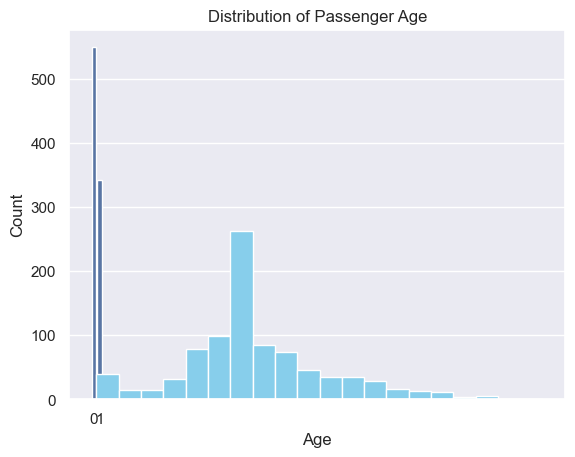

In [12]:
# Count plot for Survived
sns.countplot(x='Survived', data=df)

# Histogram for Age
plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Passenger Age")
plt.show()


<Axes: xlabel='Survived', ylabel='count'>

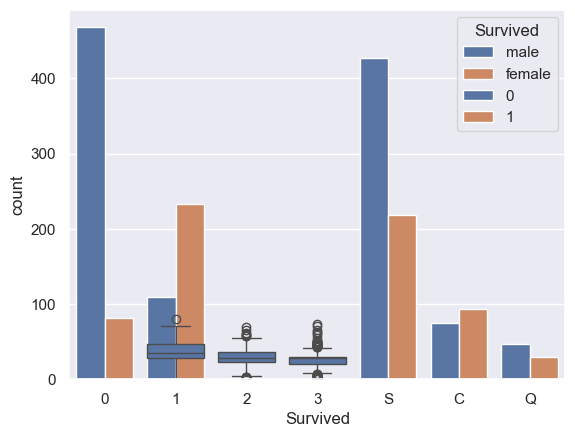

In [13]:
# Survival count by sex
sns.countplot(x='Survived', hue='Sex', data=df)

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=df)

# Survival rate by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)


Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


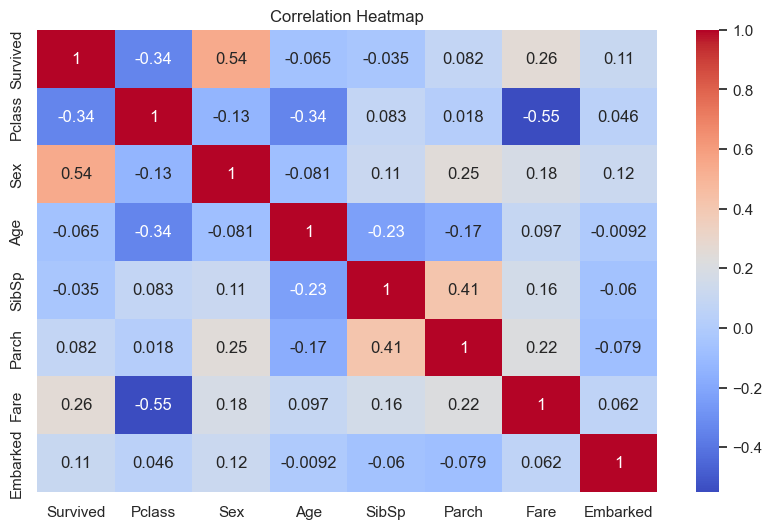

In [15]:
# Remove non-numeric columns before correlation
df_corr = df_encoded.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Re-check that all columns are numeric
print(df_corr.dtypes)

# Now draw the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
df.to_csv('titanic_cleaned.csv', index=False)